# Template for Plots

Insert Table of Contents

## Load Data

In [264]:
# Create subset of alarm_violations data frame called "dummy" for faster creation of plot examples
import pandas as pd
alarm_violations = pd.read_csv('./alarm_violations.csv')
dummy = alarm_violations.iloc[0:999]
#display(dummy.head())

## Data Overview

### Scatter/Box/Violin plot

Create single scatter, box or violin plot.

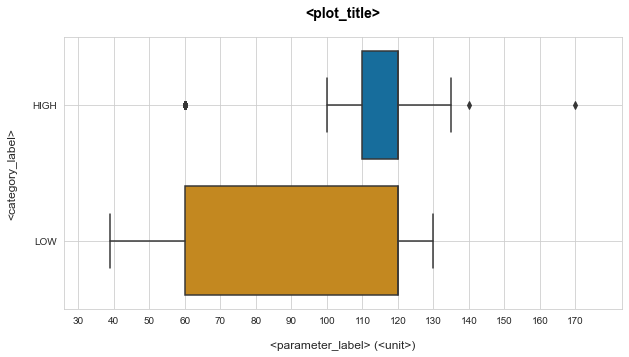

In [265]:
# Imports
import seaborn as sns
import matplotlib.pyplot as plt

# Define functions that are used for plot layout
# roundup() rounds up to the nearest ten
import math
def roundup(x):
    return int(math.ceil(x / 10.0)) * 10

# Set variables
title = "<plot_title>"
xlabel = "<parameter_label> (<unit>)"
ylabel = "<category_label>"
plotdata = dummy[(dummy["ITEMID"] == 220045)]
xvalue = "THRESHOLD_VALUE"
yvalue = "THRESHOLD_TYPE"
xlimpadding = 5 # Padding added to the x axis limits
xticks_steps = 10
xticks_lower = plotdata[xvalue].min() - (plotdata[xvalue].min() % 10) # rounds down the minimum xvalue to the nearest ten
xticks_upper = roundup( plotdata[xvalue].max() ) + xticks_steps # rounds up the maximum xvalue to the nearest ten

# Config figure
sns.set_style("whitegrid")
fig, ax = plt.subplots(
    figsize = (10, 5), 
    dpi = 72 # e.g. 72 for screen, 300 for print
    )
ax = sns.boxplot( # Insert on of: sns.stripplot , sns.boxplot , sns.violinplot
    data = plotdata, 
    x = xvalue,
    y = yvalue, # Comment out if no stratification is to be performed based on yvalue
    palette = sns.color_palette("colorblind")
    )
ax.set_title(title, fontweight='bold', color= 'black', fontsize=14, y=1.05)
ax.set_xlabel(xlabel, fontsize=12, labelpad=15)
ax.set_ylabel(ylabel, fontsize=12, labelpad=15) # Comment out if no stratification is to be performed based on yvalue
ax.set_xticks(np.arange(xticks_lower, xticks_upper, xticks_steps))
ax.grid(b=True, which='both')
ax.margins(.1)

# Plot figure
plt.show(fig)

Create one figure consisting of scatter, box and violin plot.

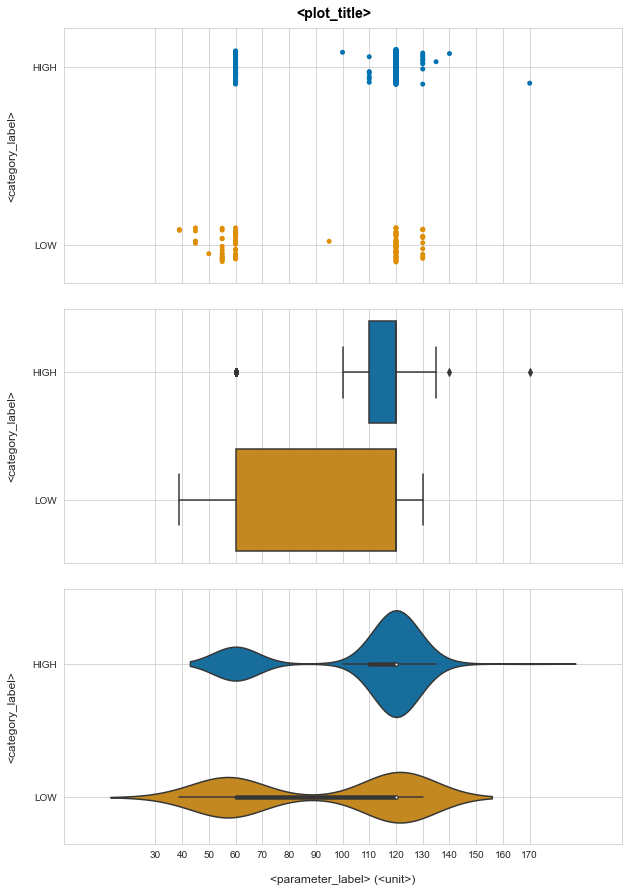

In [266]:
# Imports
import seaborn as sns
import matplotlib.pyplot as plt

# Define functions that are used for plot layout
# roundup() rounds up to the nearest ten
import math
def roundup(x):
    return int(math.ceil(x / 10.0)) * 10

# Set variables
title = "<plot_title>"
xlabel = "<parameter_label> (<unit>)"
ylabel = "<category_label>"
plotdata = dummy[(dummy["ITEMID"] == 220045)]
xvalue = "THRESHOLD_VALUE"
yvalue = "THRESHOLD_TYPE"
xlimpadding = 5 # Padding added to the x axis limits
xticks_steps = 10
xticks_lower = plotdata[xvalue].min() - (plotdata[xvalue].min() % 10) # rounds down the minimum xvalue to the nearest ten
xticks_upper = roundup( plotdata[xvalue].max() ) + xticks_steps # rounds up the maximum xvalue to the nearest ten

# Config figure
sns.set_style("whitegrid")
fig, axs = plt.subplots(
    3,
    1,
    figsize = (10, 15), 
    sharex = True, 
    dpi = 72 # e.g. 72 for screen, 300 for print
    )
fig.suptitle(title, fontweight='bold', color= 'black', fontsize=14, y=0.9)
fig.subplots_adjust(hspace = 0.1)

sns.stripplot(
    ax = axs[0],
    data = plotdata, 
    x = xvalue,
    y = yvalue, # Comment out if no stratification is to be performed based on yvalue
    palette = sns.color_palette("colorblind")
    )
axs[0].set_xlabel("")
axs[0].set_ylabel(ylabel, fontsize=12, labelpad=15) # Comment out if no stratification is to be performed based on yvalue
axs[0].set_xticks(np.arange(xticks_lower, xticks_upper, xticks_steps))
axs[0].grid(b=True, which='both')
axs[0].margins(.1)

sns.boxplot(
    ax = axs[1],
    data = plotdata, 
    x = xvalue,
    y = yvalue, # Comment out if no stratification is to be performed based on yvalue
    palette = sns.color_palette("colorblind")
    )
axs[1].set_xlabel("")
axs[1].set_ylabel(ylabel, fontsize=12, labelpad=15) # Comment out if no stratification is to be performed based on yvalue
axs[1].set_xticks(np.arange(xticks_lower, xticks_upper, xticks_steps))
axs[1].grid(b=True, which='both')
axs[1].margins(.1)

sns.violinplot(
    ax = axs[2],
    data = plotdata, 
    x = xvalue,
    y = yvalue, # Comment out if no stratification is to be performed based on yvalue
    palette = sns.color_palette("colorblind")
    )
axs[2].set_xlabel(xlabel, fontsize=12, labelpad=15)
axs[2].set_ylabel(ylabel, fontsize=12, labelpad=15) # Comment out if no stratification is to be performed based on yvalue
axs[2].set_xticks(np.arange(xticks_lower, xticks_upper, xticks_steps))
axs[2].grid(b=True, which='both')
axs[2].margins(.1)

# Plot figure
plt.show(fig)

### Boxplot and histograms (+KDE curve)

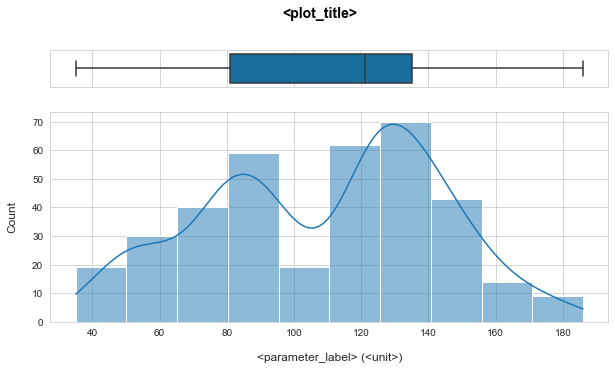

In [267]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set variables
title = "<plot_title>"
xlabel = "<parameter_label> (<unit>)"
plotdata = dummy[(dummy["ITEMID"] == 220045)]
xvalue = "VALUENUM"

sns.set_style("whitegrid")
fig, (fig_box, fig_hist) = plt.subplots(
    2, 
    sharex=True, 
    gridspec_kw={"height_ratios": (.15, .85)}, 
    figsize=(10, 5)
    )
fig.suptitle(title, fontweight='bold', color= 'black', fontsize=14, y=1)
sns.boxplot(ax=fig_box, data=plotdata, x=xvalue, palette=sns.color_palette("colorblind"))
fig_box.set(xlabel="")
sns.histplot(ax=fig_hist, data=plotdata, x=xvalue, kde=True, palette=sns.color_palette("colorblind"))
fig_hist.set_xlabel(xlabel, fontsize=12, labelpad=15)
fig_hist.set_ylabel("Count", fontsize=12, labelpad=15)

plt.show()

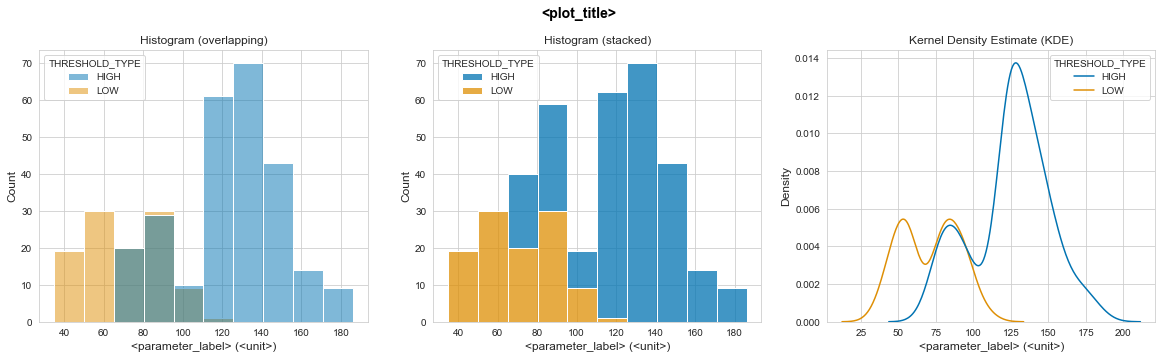

In [268]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set variables
title = "<plot_title>"
xlabel = "<parameter_label> (<unit>)"
plotdata = dummy[(dummy["ITEMID"] == 220045)]
xvalue = "VALUENUM"
stratify_by = "THRESHOLD_TYPE"

sns.set_style("whitegrid")
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle(title, fontweight='bold', color= 'black', fontsize=14, y=1)

sns.histplot(ax=axs[0], data=plotdata, x=xvalue, hue=stratify_by, palette=[sns.color_palette("colorblind")[0],sns.color_palette("colorblind")[1]])
axs[0].set_title("Histogram (overlapping)", fontsize=12)
axs[0].set_xlabel(xlabel, fontsize=12)
axs[0].set_ylabel("Count", fontsize=12)

sns.histplot(ax=axs[1], data=plotdata, x=xvalue, hue=stratify_by, multiple="stack", palette=[sns.color_palette("colorblind")[0],sns.color_palette("colorblind")[1]])
axs[1].set_title("Histogram (stacked)", fontsize=12)
axs[1].set_xlabel(xlabel, fontsize=12)
axs[1].set_ylabel("Count", fontsize=12)

sns.kdeplot(ax=axs[2], data=plotdata, x=xvalue, hue=stratify_by, palette=[sns.color_palette("colorblind")[0],sns.color_palette("colorblind")[1]])
axs[2].set_title("Kernel Density Estimate (KDE)", fontsize=12)
axs[2].set_xlabel(xlabel, fontsize=12)
axs[2].set_ylabel("Density", fontsize=12)

plt.show(fig)

### Boxplot difference between value and threshold

In [269]:
# Create new column that shows the dif between actual value and threshold
dummy['DIF_ACTUAL_TH'] = dummy['VALUENUM'] - dummy['THRESHOLD_VALUE']
#dummy.head()

<ipython-input-269-3ebc2bea6a9c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dummy['DIF_ACTUAL_TH'] = dummy['VALUENUM'] - dummy['THRESHOLD_VALUE']


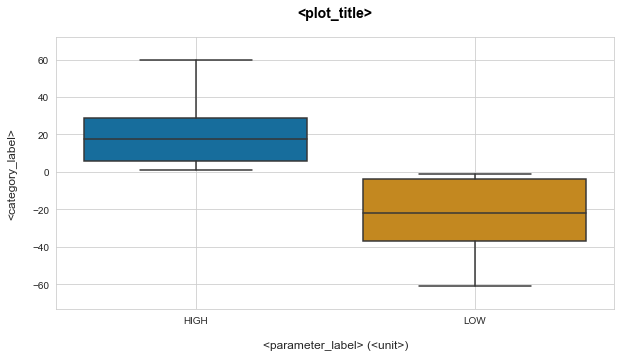

In [270]:
# Imports
import seaborn as sns
import matplotlib.pyplot as plt

# Set variables
title = "<plot_title>"
xlabel = "<parameter_label> (<unit>)"
ylabel = "<category_label>"
plotdata = dummy[(dummy["ITEMID"] == 220045)]
xvalue = "THRESHOLD_TYPE"
yvalue = "DIF_ACTUAL_TH"

# Config figure
sns.set_style("whitegrid")
fig, ax = plt.subplots(
    figsize = (10, 5), 
    dpi = 72 # e.g. 72 for screen, 300 for print
    )
ax = sns.boxplot( # Insert on of: sns.stripplot , sns.boxplot , sns.violinplot
    data = plotdata, 
    x = xvalue,
    y = yvalue, # Comment out if no stratification is to be performed based on yvalue
    palette = sns.color_palette("colorblind")
    )
ax.set_title(title, fontweight='bold', color= 'black', fontsize=14, y=1.05)
ax.set_xlabel(xlabel, fontsize=12, labelpad=15)
ax.set_ylabel(ylabel, fontsize=12, labelpad=15) # Comment out if no stratification is to be performed based on yvalue
ax.grid(b=True, which='both')
ax.margins(.1)

# Plot figure
plt.show(fig)

## Time Series

to be done